In [1]:
#conda install -c anaconda keras

In [2]:
#pip install --upgrade tensorflow

In [3]:
#pip install --upgrade keras

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import RandomForestClassifier
from pyswarm import pso

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [6]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

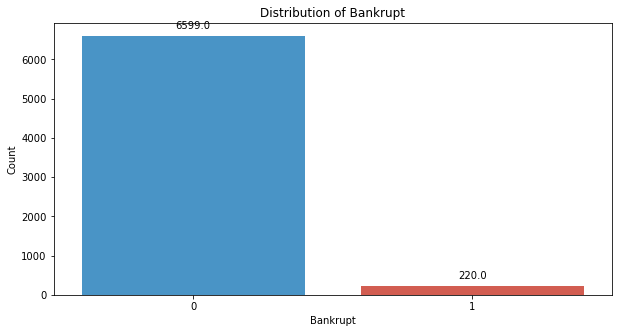

In [7]:
#Distribution representation
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=df['Bankrupt?'], data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [8]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [9]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

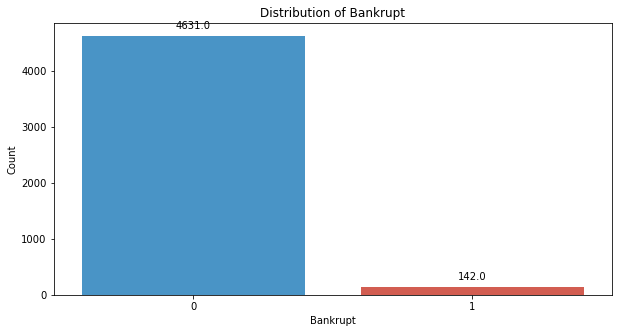

In [10]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [11]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
# Address Class Imbalance
class_weights = {0: 1, 1: 10} 

In [13]:
# Neural Network Model
def create_model(params):
    model = Sequential()
    model.add(Dense(params[0], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
# PSO Objective Function
def objective_function(params):
    hidden_units = int(params[0])
    model = create_model([hidden_units])
    model.fit(X_train, y_train, epochs=20, class_weight=class_weights, verbose=0)
    y_val_prob = model.predict(X_val)
    y_val_pred = (y_val_prob > 0.4).astype(int)  # Adjust the threshold
    f1 = f1_score(y_val, y_val_pred)
    return -f1  # PSO minimizes the objective function, so we use negative F1 score

In [15]:
# PSO Optimization
lb = [5]  # Lower bounds for the number of hidden units
ub = [50]  # Upper bounds for the number of hidden units
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [16]:
# Train the final model with the best parameters
best_hidden_units = int(best_params[0])
final_model = create_model([best_hidden_units])
final_model.fit(X_train, y_train, epochs=50, class_weight=class_weights, verbose=1)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.8314 - loss: 185929968.0000
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8111 - loss: 89412192.0000
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.7576 - loss: 60881392.0000
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7875 - loss: 32594348.0000
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7984 - loss: 27801148.0000
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.7996 - loss: 27531164.0000
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8199 - loss: 21824294.0000
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8198 - loss: 21905296.0000
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8085 - loss: 21229430.0000
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 19681258.0000
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/

In [17]:
# Evaluate the final model on the validation set
y_val_prob = final_model.predict(X_val)
y_pred_val = (y_val_prob > 0.4).astype(int)  # Adjust the threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [18]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1_value = f1_score(y_val, y_pred_val)
val_report = classification_report(y_val, y_pred_val)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9296187683284457
Precision 0.0975609756097561
Recall 0.10256410256410256
F1 Score 0.1
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       984
           1       0.10      0.10      0.10        39

    accuracy                           0.93      1023
   macro avg       0.53      0.53      0.53      1023
weighted avg       0.93      0.93      0.93      1023



In [19]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[947  37]
 [ 35   4]]


In [20]:
# Evaluate the final model on the validation set
y_test_prob = final_model.predict(X_test)
y_pred_test = (y_test_prob > 0.4).astype(int)  # Adjust the threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


In [21]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val, y_pred_test)
precision = precision_score(y_val, y_pred_test)
recall = recall_score(y_val, y_pred_test)
f1_value = f1_score(y_val, y_pred_test)
val_report = classification_report(y_val, y_pred_test)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.927663734115347
Precision 0.0
Recall 0.0
F1 Score 0.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       984
           1       0.00      0.00      0.00        39

    accuracy                           0.93      1023
   macro avg       0.48      0.48      0.48      1023
weighted avg       0.92      0.93      0.93      1023



In [22]:
conf_matrix = confusion_matrix(y_val, y_pred_test)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[949  35]
 [ 39   0]]


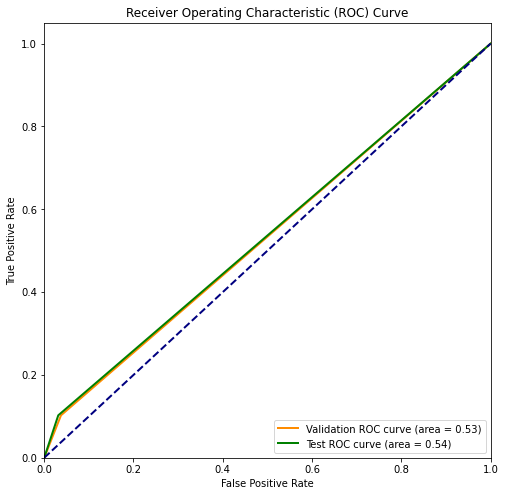

In [24]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()